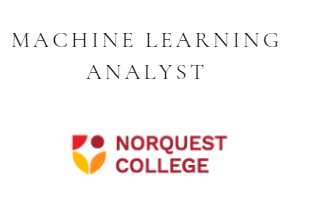

[Link to form](https://docs.google.com/forms/d/1tExBK8RlcBqLLrZCo3IHKlwma2-6qCb66uOJHLT81LM/edit)

[Link to Dataset](https://docs.google.com/spreadsheets/d/1wRp72PgJDvbbyOS5IXtlnCC_0xv6sRbX0dhJmX_Bos0/edit?resourcekey#gid=1842242084)

#Project Summary: Edmonton Food Drive
The Edmonton Food Drive, organized annually by the Church of Jesus Christ of Latter-day Saints, is a community initiative aimed at collecting donations for those in need. The drive occurs once every year and is conducted across various wards and stakes in the Edmonton area. This data project focuses on analyzing the 2023 food drive dataset, with the goal of predicting donation volumes and optimizing route completion times. By leveraging machine learning models, the project aims to enhance the efficiency of the donation process and better support future food drive events.


#Exploratory Data Analysis (EDA) & Data Preprocessing - Edmonton Food Drive 2023
In this notebook, I conducted an Exploratory Data Analysis (EDA) and Data Preprocessing on the 2023 Edmonton Food Drive dataset. The goal was to uncover key insights and prepare the data for building a predictive model for donation bag volumes and route completion times.

**Key Tasks**:
**Data Preprocessing Steps**:

**Handling Missing Values**: Identified and handled missing data by imputing values or removing incomplete rows to ensure a clean dataset.
Removing Duplicates: Checked for and removed any duplicate entries to maintain data consistency.

**Converting Data Types**: Ensured that columns with date and time data were correctly formatted as datetime objects for proper analysis.

**Feature Engineering**: Created new features based on existing columns, such as calculating the time spent on each route from start and end times.
Handling Outliers: Detected and managed outliers in key numerical features like donation volumes and route times to prevent skewed results.

**Data Scaling**: Applied normalization or standardization where necessary to ensure all features are on a similar scale for model training.
Exploratory Data Analysis (EDA):

**Data Overview**: Examined the structure of the dataset, including data types and summary statistics.

**Distribution Analysis**: Visualized the distribution of key variables like donation volumes and route completion times using histograms and box plots.

**Correlation Analysis**: Used heatmaps and pair plots to explore relationships between numerical features and identify potential predictors.

**Categorical Data Exploration**: Analyzed categorical variables such as donation types and neighborhoods with bar charts and pie charts.

**Outlier Detection**: Identified any outliers in the dataset that could impact model performance.

The EDA and data preprocessing steps provided crucial insights into the dataset, cleaned and transformed it for modeling, and laid the foundation for the predictive tasks in the next phase of the project.

**Importing Necessary Libraries**- This  provides access to pre-built functions and tools for data manipulation, visualization, machine learning, and efficient computations, saving time and ensuring reliability.


In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Loading the Dataset** -  This gives the ability to store the data in a pandas data frame, allowing access to the dataset within the notebook which provides better readability, and interpretation, and allows easier data manipulation.

In [ ]:
# Load the dataset with a specified encoding
data = pd.read_csv('Edited Proposed Data Collection.csv', encoding='latin1')



In [ ]:
#previewing of the data
data.head()

Timestamp Email address     Drop Off Location  City  \
0  9/23/2023 10:36:10           NaN    Londonderry Chapel   NaN   
1  9/23/2023 10:36:52           NaN  Gateway Stake Centre   NaN   
2  9/23/2023 10:40:22           NaN  Gateway Stake Centre   NaN   
3  9/23/2023 10:41:08           NaN  Gateway Stake Centre   NaN   
4  9/23/2023 10:44:10           NaN    Londonderry Chapel   NaN   

               Stake  Ward/Branch  Route Number/Name  \
0  Bonnie Doon Stake          NaN                NaN   
1      Gateway Stake          NaN                NaN   
2      Gateway Stake          NaN                NaN   
3      Gateway Stake          NaN                NaN   
4  Bonnie Doon Stake          NaN                NaN   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  ...  Ward/Branch.4 Ward/Branch.5  \
0                                14.0  ...            NaN           NaN   
1                                18.0  ...            NaN           NaN   
2                                20.0  ...            NaN           NaN   
3                                20.0  ...            NaN           NaN   
4                                 2.0  ...            NaN           NaN   

   Ward/Branch.6 Ward/Branch.7  Comments  Number of routes completed  \
0            NaN           NaN       NaN                         NaN   
1            NaN           NaN       NaN                           2   
2            NaN           NaN       NaN                         NaN   
3            NaN           NaN       NaN                           1   
4            NaN           NaN       NaN                         NaN   

   # of Doors in Route  The time you started at:  The time you ended at  \
0                   14                  10:00:00               10:25:00   
1                  144                  10:00:00               10:30:00   
2                  186                  10:00:00               10:30:00   
3                  NaN                  10:00:00               10:30:00   
4                    1                       NaN                    NaN   

  Route Number/Name.1  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 26 columns]

# Data Cleaning

This phase focuses on preparing the dataset by ensuring it is clean, consistent, and ready for analysis. The following key tasks were performed:

**Removing Duplicates**: Identified and removed duplicate rows to eliminate redundancy and ensure data accuracy.

**Merging Columns**: Combined related columns to simplify the dataset and enhance usability.

**Changing Data Types**: Converted columns (e.g., dates and times) to appropriate formats for accurate computations and analysis.

**Handling Missing Data**: Addressed missing values by filling, imputing, or removing rows/columns based on the context.
Outlier Detection: Identified and handled outliers that could distort the analysis and model performance.

**Standardizing Data**: Ensured consistency in naming conventions, units, and formats across columns.

**Handling Inconsistent Data**: Corrected any inconsistencies, such as misspelled categories or mislabeled entries, to standardize the dataset.
These steps ensured the dataset is accurate, complete,


In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             454 non-null    object 
 1   Email address                                         111 non-null    object 
 2   Drop Off Location                                     454 non-null    object 
 3   City                                                  0 non-null      float64
 4   Stake                                                 454 non-null    object 
 5   Ward/Branch                                           0 non-null      float64
 6   Route Number/Name                                     0 non-null      float64
 7   # of Adult Volunteers in this route                   453 non-null    float64
 8   # of Youth Volunteers in this route                   453 no

In [ ]:
# Remove duplicate and irrelevant columns. Email Address occurs twice in columns 1 & 12
# We merged the data in columns 13 to 19 into column 13, so we drop columns 5, 14 to 19 for Ward/Branch
# We also dropn city, comments, route number/name

data = data.drop(columns=['City','Email address','Email Address', 'Ward/Branch', 'Ward/Branch.2', 'Ward/Branch.3', 'Ward/Branch.4', 'Ward/Branch.5', 'Ward/Branch.6','Ward/Branch.7', 'Comments','Route Number/Name'])


In [ ]:
data = data.rename(columns={'Ward/Branch.1': 'Ward/Branch'})

In [ ]:
data.head()

Timestamp     Drop Off Location              Stake  \
0  9/23/2023 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  9/23/2023 10:36:52  Gateway Stake Centre      Gateway Stake   
2  9/23/2023 10:40:22  Gateway Stake Centre      Gateway Stake   
3  9/23/2023 10:41:08  Gateway Stake Centre      Gateway Stake   
4  9/23/2023 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

  Number of routes completed # of Doors in Route The time you started at:  \
0                        NaN                  14                 10:00:00   
1                          2                 144                 10:00:00   
2                        NaN                 186                 10:00:00   
3                          1                 NaN                 10:00:00   
4                        NaN                   1                      NaN   

  The time you ended at  Route Number/Name.1  
0              10:25:00                  NaN  
1              10:30:00                  NaN  
2              10:30:00                  NaN  
3              10:30:00                  NaN  
4                   NaN                  NaN

In [ ]:
# Display basic information about the dataset again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             454 non-null    object 
 1   Drop Off Location                                     454 non-null    object 
 2   Stake                                                 454 non-null    object 
 3   # of Adult Volunteers in this route                   453 non-null    float64
 4   # of Youth Volunteers in this route                   453 non-null    float64
 5   # of Donation Bags Collected/Route                    453 non-null    float64
 6   Time to Complete (in minutes) pick up of bags /route  454 non-null    float64
 7   Did you complete more than 1 route?                   454 non-null    object 
 8   Ward/Branch                                           447 no

This code converts the columns "The time you started at" and "The time you ended at" into datetime objects so the values can be used for time calculations.

In [ ]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects
data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])

# Calculate the time spent and create a new column "Time Spent"
data['Time Spent'] = (data['The time you ended at'] - data['The time you started at:']).dt.total_seconds() / 60

# Print the updated DataFrame
print(data[['The time you started at:', 'The time you ended at', 'Time Spent']])


    The time you started at: The time you ended at  Time Spent
0        2024-10-02 10:00:00   2024-10-02 10:25:00        25.0
1        2024-10-02 10:00:00   2024-10-02 10:30:00        30.0
2        2024-10-02 10:00:00   2024-10-02 10:30:00        30.0
3        2024-10-02 10:00:00   2024-10-02 10:30:00        30.0
4                        NaT                   NaT         NaN
..                       ...                   ...         ...
449      2024-10-02 10:30:00   2024-10-02 11:15:00        45.0
450      2024-10-02 10:30:00   2024-10-02 11:15:00        45.0
451      2024-10-02 18:00:00   2024-10-02 20:00:00       120.0
452      2024-10-02 10:30:00   2024-10-02 13:00:00       150.0
453                      NaT                   NaT         NaN

[454 rows x 3 columns]


<ipython-input-65-8a2ebe7d7118>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
<ipython-input-65-8a2ebe7d7118>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])


In [ ]:
data.head()

Timestamp     Drop Off Location              Stake  \
0  9/23/2023 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  9/23/2023 10:36:52  Gateway Stake Centre      Gateway Stake   
2  9/23/2023 10:40:22  Gateway Stake Centre      Gateway Stake   
3  9/23/2023 10:41:08  Gateway Stake Centre      Gateway Stake   
4  9/23/2023 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

  Number of routes completed # of Doors in Route The time you started at:  \
0                        NaN                  14      2024-10-02 10:00:00   
1                          2                 144      2024-10-02 10:00:00   
2                        NaN                 186      2024-10-02 10:00:00   
3                          1                 NaN      2024-10-02 10:00:00   
4                        NaN                   1                      NaT   

  The time you ended at  Route Number/Name.1  Time Spent  
0   2024-10-02 10:25:00                  NaN        25.0  
1   2024-10-02 10:30:00                  NaN        30.0  
2   2024-10-02 10:30:00                  NaN        30.0  
3   2024-10-02 10:30:00                  NaN        30.0  
4                   NaT                  NaN         NaN

In [ ]:
# Drop the "The time you started at" and "The time you ended at" columns
data = data.drop(columns=['The time you started at:', 'The time you ended at'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             454 non-null    object 
 1   Drop Off Location                                     454 non-null    object 
 2   Stake                                                 454 non-null    object 
 3   # of Adult Volunteers in this route                   453 non-null    float64
 4   # of Youth Volunteers in this route                   453 non-null    float64
 5   # of Donation Bags Collected/Route                    453 non-null    float64
 6   Time to Complete (in minutes) pick up of bags /route  454 non-null    float64
 7   Did you complete more than 1 route?                   454 non-null    object 
 8   Ward/Branch                                           447 no

In [ ]:
# Convert "Number of routes completed" and "# of Doors in Route" columns to numeric. Currently "objects"
data['Number of routes completed'] = pd.to_numeric(data['Number of routes completed'], errors='coerce')
data['# of Doors in Route'] = pd.to_numeric(data['# of Doors in Route'], errors='coerce')


In [ ]:
# Handle missing values (if any)
# Calculate the average values for 'Number of routes completed' and '# of Doors in Route'
avg_routes_completed = data['Number of routes completed'].mean()
avg_doors_in_route = data['# of Doors in Route'].mean()
avg_time_spent = data['Time Spent'].mean()
# Fill missing values with the averages
data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
data['Time Spent'].fillna(avg_time_spent, inplace=True)
data.head()


<ipython-input-70-458437c7b95f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
<ipython-input-70-458437c7b95f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

Timestamp     Drop Off Location              Stake  \
0  9/23/2023 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  9/23/2023 10:36:52  Gateway Stake Centre      Gateway Stake   
2  9/23/2023 10:40:22  Gateway Stake Centre      Gateway Stake   
3  9/23/2023 10:41:08  Gateway Stake Centre      Gateway Stake   
4  9/23/2023 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

   Number of routes completed  # of Doors in Route  Route Number/Name.1  \
0                    2.402685            14.000000                  NaN   
1                    2.000000           144.000000                  NaN   
2                    2.402685           186.000000                  NaN   
3                    1.000000           194.894484                  NaN   
4                    2.402685             1.000000                  NaN   

   Time Spent  
0   25.000000  
1   30.000000  
2   30.000000  
3   30.000000  
4  -30.269048

In [ ]:
# Calculate 'Total Volunteers' using column indices without modifying the original DataFrame
total_volunteers = data.iloc[4] + data.iloc[5]

In [ ]:
# Calculate 'Total Volunteers'
total_volunteers = data=['# of Adult Volunteers in this route'] + data['# of Youth Volunteers in this route']

#Add new item to Series
data['Total Volunteers'] = total_volunteers

KeyError: '# of Youth Volunteers in this route'

In [ ]:
# Calculate 'Total Volunteers' using column indices
data['Total Volunteers'] = data.iloc[:, 4] + data.iloc[:, 5]

data['Total Volunteers'] = total_volunteers

In [ ]:
data.head()

Date              Location              Stake  \
0 2023-09-23 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1 2023-09-23 10:36:52  Gateway Stake Centre      Gateway Stake   
2 2023-09-23 10:40:22  Gateway Stake Centre      Gateway Stake   
3 2023-09-23 10:41:08  Gateway Stake Centre      Gateway Stake   
4 2023-09-23 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers  # of Youth Volunteers  Donation Bags Collected  \
0                      1                      3                       14   
1                      3                      1                       18   
2                      2                      0                       20   
3                      2                      0                       20   
4                      1                      0                        2   

   Time to Complete (min)  Completed More Than One Route  \
0                    25.0                              0   
1                    25.0                              1   
2                    30.0                              0   
3                    25.0                              1   
4                     5.0                              0   

            Ward/Branch  Routes Completed  Doors in Route  \
0        Clareview Ward                 2              14   
1  Crawford Plains Ward                 2             144   
2     Silver Berry Ward                 2             186   
3  Crawford Plains Ward                 1             194   
4      Londonderry Ward                 2               1   

   Route Number/Name.1  Time Spent Total Volunteers  
0                  NaN   25.000000              NaN  
1                  NaN   30.000000              NaN  
2                  NaN   30.000000              NaN  
3                  NaN   30.000000              NaN  
4                  NaN  -30.269048              NaN

In [ ]:
# Handle missing values in 'number of adult volunteers', 'youth volunteers' and 'number of donation bags collected/route'
# Calculate the average values for 'number of adult volunteers', 'youth volunteers', and 'number of donation bags collected/route'

avg_Adult_Volunteers = data['# of Adult Volunteers in this route'].mean()
avg_Youth_Volunteers = data['# of Youth Volunteers in this route'].mean()
avg_Donation_Bags_Collected = data['# of Donation Bags Collected/Route'].mean()
# Fill missing values with the averages
data['# of Adult Volunteers in this route'].fillna(avg_Adult_Volunteers, inplace=True)
data['# of Youth Volunteers in this route'].fillna(avg_Youth_Volunteers, inplace=True)
data['# of Donation Bags Collected/Route'].fillna(avg_Donation_Bags_Collected, inplace=True)
data.head()

<ipython-input-73-b0b88bcc1b6a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['# of Adult Volunteers in this route'].fillna(avg_Adult_Volunteers, inplace=True)
<ipython-input-73-b0b88bcc1b6a>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

Timestamp     Drop Off Location              Stake  \
0  9/23/2023 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1  9/23/2023 10:36:52  Gateway Stake Centre      Gateway Stake   
2  9/23/2023 10:40:22  Gateway Stake Centre      Gateway Stake   
3  9/23/2023 10:41:08  Gateway Stake Centre      Gateway Stake   
4  9/23/2023 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  0.0   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

   Number of routes completed  # of Doors in Route  Route Number/Name.1  \
0                    2.402685            14.000000                  NaN   
1                    2.000000           144.000000                  NaN   
2                    2.402685           186.000000                  NaN   
3                    1.000000           194.894484                  NaN   
4                    2.402685             1.000000                  NaN   

   Time Spent  
0   25.000000  
1   30.000000  
2   30.000000  
3   30.000000  
4  -30.269048

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                                 0
Drop Off Location                                         0
Stake                                                     0
# of Adult Volunteers in this route                       0
# of Youth Volunteers in this route                       0
# of Donation Bags Collected/Route                        0
Time to Complete (in minutes) pick up of bags /route      0
Did you complete more than 1 route?                       0
Ward/Branch                                               7
Number of routes completed                                0
# of Doors in Route                                       0
Route Number/Name.1                                     453
Time Spent                                                0
dtype: int64


In [ ]:

# Rename columns for clarity
data = data.rename(columns={
    'Timestamp': 'Date',
    'Drop Off Location': 'Location',
    'City': 'City',
    'Stake': 'Stake',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers in this route': '# of Adult Volunteers',
    '# of Youth Volunteers in this route': '# of Youth Volunteers',
    '# of Donation Bags Collected/Route': 'Donation Bags Collected',
    'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'Number of routes completed': 'Routes Completed',
    '# of Doors in Route': 'Doors in Route'
})


In [ ]:
# Print the dtypes for each column
data.dtypes

Date                              object
Location                          object
Stake                             object
# of Adult Volunteers            float64
# of Youth Volunteers            float64
Donation Bags Collected          float64
Time to Complete (min)           float64
Completed More Than One Route     object
Ward/Branch                       object
Routes Completed                 float64
Doors in Route                   float64
Route Number/Name.1              float64
Time Spent                       float64
dtype: object

In [ ]:
data.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
# Convert columns to integer data types
int_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected','Routes Completed','Doors in Route']
data[int_columns] = data[int_columns].astype(int)

In [ ]:
# Convert columns to the right data types
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime
data['Routes Completed'] = data['Routes Completed'].astype(int)  # Convert 'Routes Completed' to float
data['Doors in Route'] = data['Doors in Route'].astype(int)  # Convert 'Doors in Route' to float
data['Time Spent'] = data['Time Spent'].astype(float)  # Convert 'Time Spent' to float




In [ ]:
data['Completed More Than One Route'] = data['Completed More Than One Route'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
# data['Completed More Than One Route'] = data['Completed More Than One Route'].astype(str)
print(data.dtypes)



Date                             datetime64[ns]
Location                                 object
Stake                                    object
# of Adult Volunteers                     int64
# of Youth Volunteers                     int64
Donation Bags Collected                   int64
Time to Complete (min)                  float64
Completed More Than One Route             int64
Ward/Branch                              object
Routes Completed                          int64
Doors in Route                            int64
Route Number/Name.1                     float64
Time Spent                              float64
dtype: object


In [ ]:
data.head()

Date              Location              Stake  \
0 2023-09-23 10:36:10    Londonderry Chapel  Bonnie Doon Stake   
1 2023-09-23 10:36:52  Gateway Stake Centre      Gateway Stake   
2 2023-09-23 10:40:22  Gateway Stake Centre      Gateway Stake   
3 2023-09-23 10:41:08  Gateway Stake Centre      Gateway Stake   
4 2023-09-23 10:44:10    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers  # of Youth Volunteers  Donation Bags Collected  \
0                      1                      3                       14   
1                      3                      1                       18   
2                      2                      0                       20   
3                      2                      0                       20   
4                      1                      0                        2   

   Time to Complete (min)  Completed More Than One Route  \
0                    25.0                              0   
1                    25.0                              1   
2                    30.0                              0   
3                    25.0                              1   
4                     5.0                              0   

            Ward/Branch  Routes Completed  Doors in Route  \
0        Clareview Ward                 2              14   
1  Crawford Plains Ward                 2             144   
2     Silver Berry Ward                 2             186   
3  Crawford Plains Ward                 1             194   
4      Londonderry Ward                 2               1   

   Route Number/Name.1  Time Spent  
0                  NaN   25.000000  
1                  NaN   30.000000  
2                  NaN   30.000000  
3                  NaN   30.000000  
4                  NaN  -30.269048

# Exploratory Data Analysis

The Exploratory Data Analysis (EDA) phase focused on gaining insights from the dataset and understanding its structure, patterns, and relationships. The following key tasks were performed:

**Visualizing Distributions**:
Used histograms to visualize the distribution of continuous variables, helping to identify skewness, trends, and outliers.

**Exploring Relationships**:
Utilized heatmaps to examine correlations between variables, highlighting strong relationships or potential multicollinearity.

**Categorical Data Analysis**:
Created bar charts to visualize the frequency distribution of categorical variables, providing insights into class imbalances or trends.

**Proportions of Categories**:
Used pie charts to display the proportions of different categories in the dataset, giving a clear view of the distribution of categorical features.

**Automated EDA**:
Leveraged AutoEDA tools to quickly generate a comprehensive analysis of the dataset, including visualizations, summary statistics, and initial feature insights, speeding up the exploration process.

In [ ]:
data.describe()

Date  # of Adult Volunteers  \
count                            454              454.00000   
mean   2023-09-24 11:23:54.110131968                2.50000   
min              2023-09-23 10:36:10                0.00000   
25%    2023-09-23 11:38:33.249999872                2.00000   
50%       2023-09-23 12:04:36.500000                2.00000   
75%              2023-09-23 12:41:58                2.00000   
max              2024-09-10 16:03:36               46.00000   
std                              NaN                3.97717   

       # of Youth Volunteers  Donation Bags Collected  Time to Complete (min)  \
count             454.000000               454.000000              454.000000   
mean                1.570485                32.715859               55.106828   
min                 0.000000                 1.000000                1.000000   
25%                 0.000000                17.000000               30.000000   
50%                 1.000000                25.000000               45.000000   
75%                 3.000000                37.000000               60.000000   
max                20.000000               555.000000              245.000000   
std                 1.895297                35.370831               34.938295   

       Completed More Than One Route  Routes Completed  Doors in Route  \
count                     454.000000        454.000000      454.000000   
mean                        0.339207          2.129956      194.821586   
min                         0.000000          1.000000        1.000000   
25%                         0.000000          2.000000      116.000000   
50%                         0.000000          2.000000      172.500000   
75%                         1.000000          2.000000      214.750000   
max                         1.000000          8.000000     2500.000000   
std                         0.473962          0.629188      173.319306   

       Route Number/Name.1  Time Spent  
count                  1.0  454.000000  
mean                  11.0  -30.269048  
min                   11.0 -690.000000  
25%                   11.0   25.000000  
50%                   11.0   45.000000  
75%                   11.0   62.500000  
max                   11.0  754.000000  
std                    NaN  240.655794

Text(0.5, 1.0, 'Distribution of Adult Volunteers')

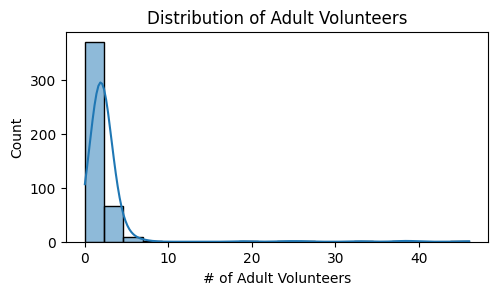

In [ ]:
# Visualize the distribution of numerical features
# A histogram plot of the adult volunteers
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

Text(0.5, 1.0, 'Distribution of Youth Volunteers')

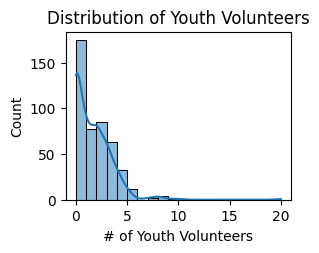

In [ ]:
# A histogram plot of the youth volunteers

plt.subplot(2, 2, 2)
sns.histplot(data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

Text(0.5, 1.0, 'Distribution of Donation Bags Collected')

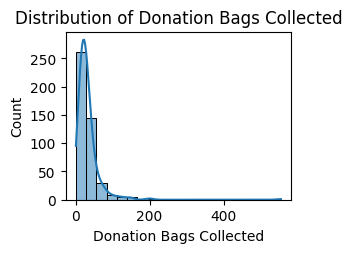

In [ ]:
# A histogram plot of the donation bags collected

plt.subplot(2, 2, 3)
sns.histplot(data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

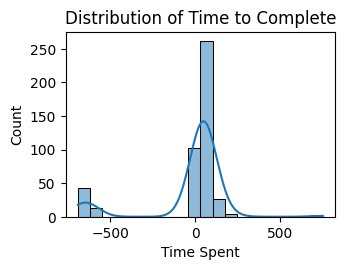

In [ ]:
# A histogram plot of the time to complete collection

plt.subplot(2, 2, 4)
sns.histplot(data['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time to Complete')

plt.tight_layout()
plt.show()


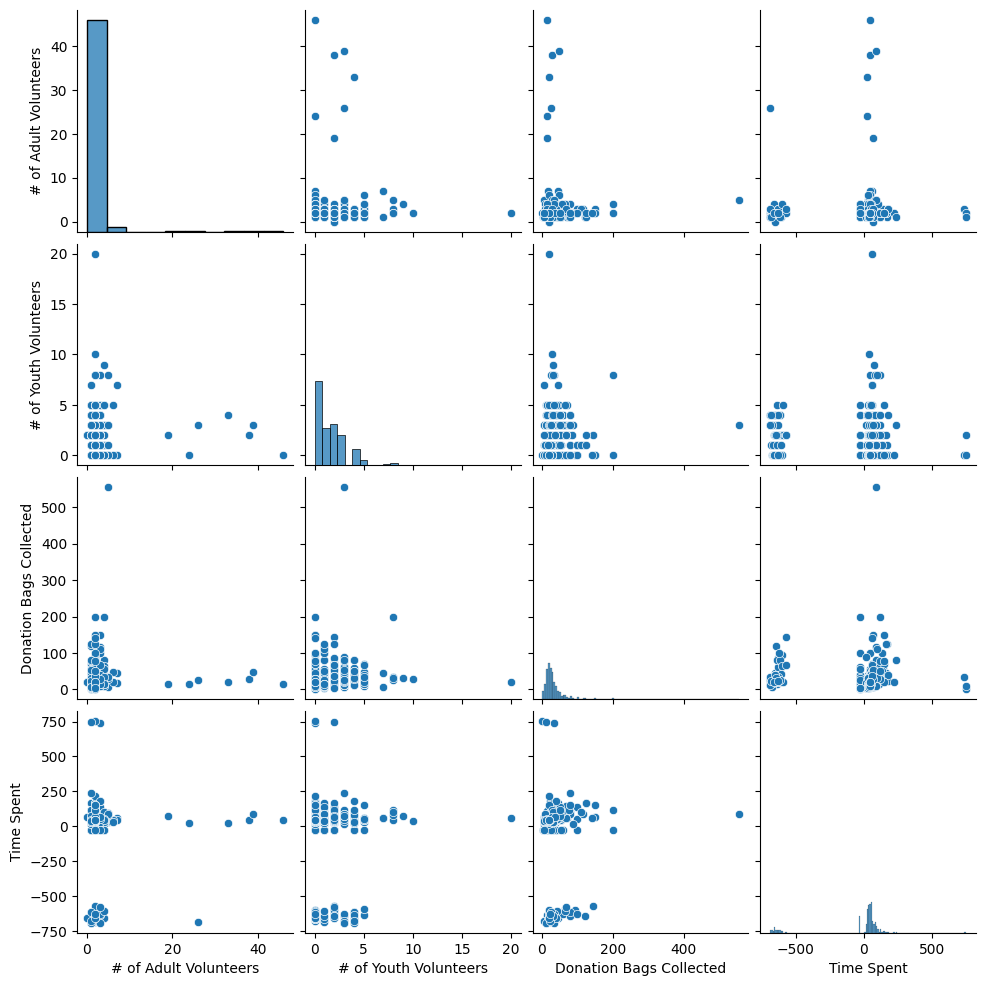

In [ ]:
# Visualize relationships between numerical features
sns.pairplot(data[['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time Spent']])
plt.show()

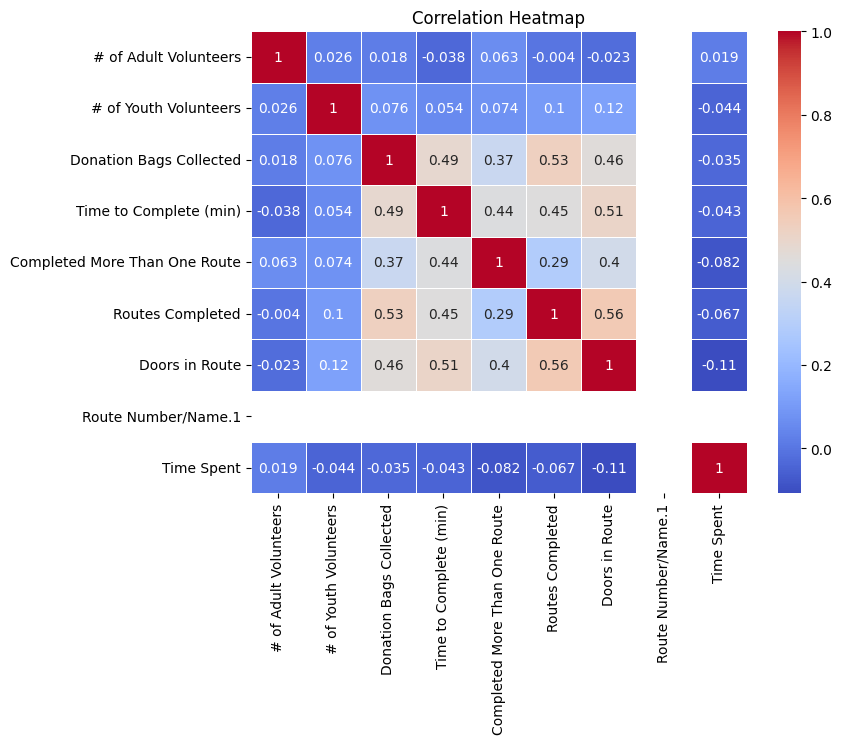

In [ ]:
# Correlation heatmap for numerical features

import numpy as np
correlation_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

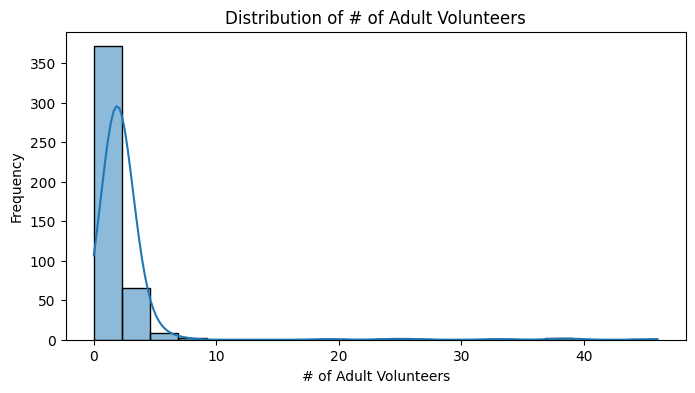

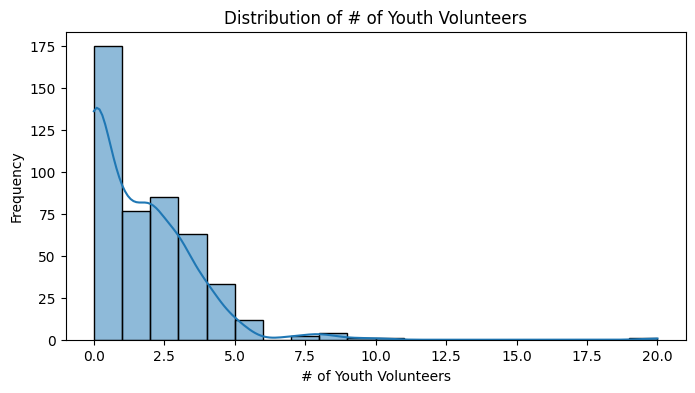

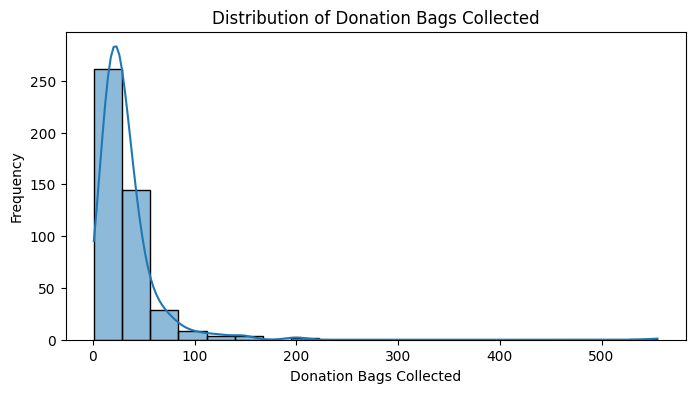

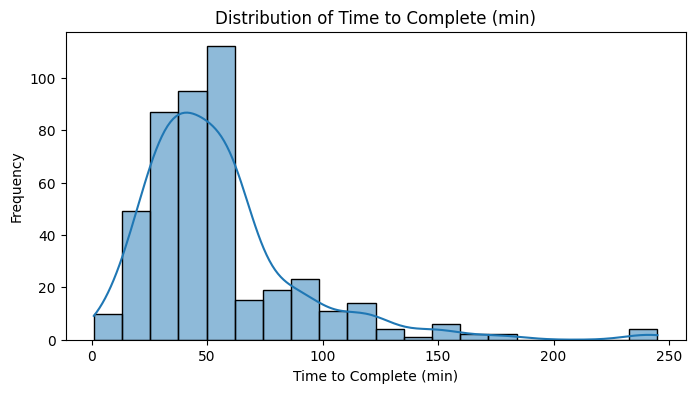

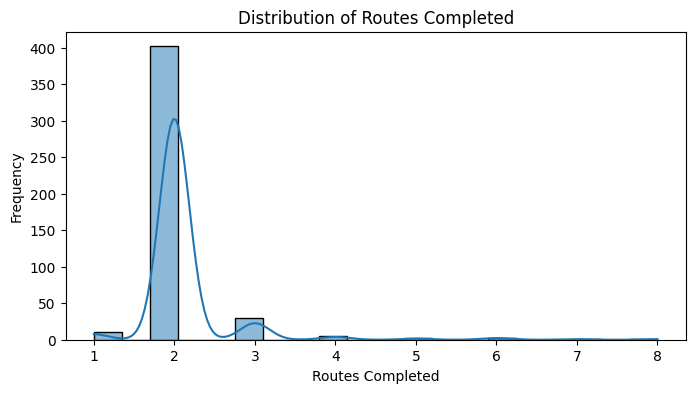

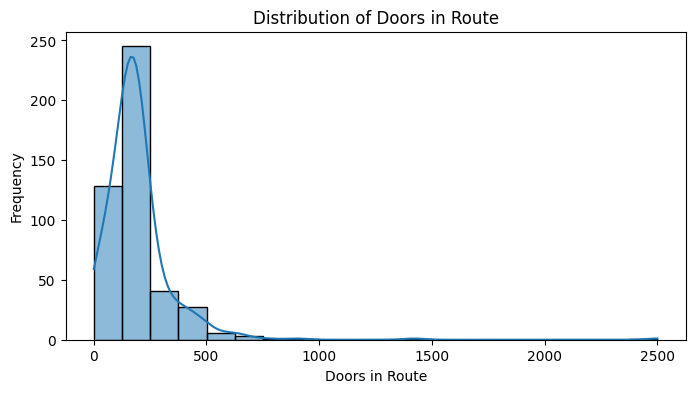

In [ ]:
# Distribution of numerical variables

numerical_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time to Complete (min)', 'Routes Completed', 'Doors in Route']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

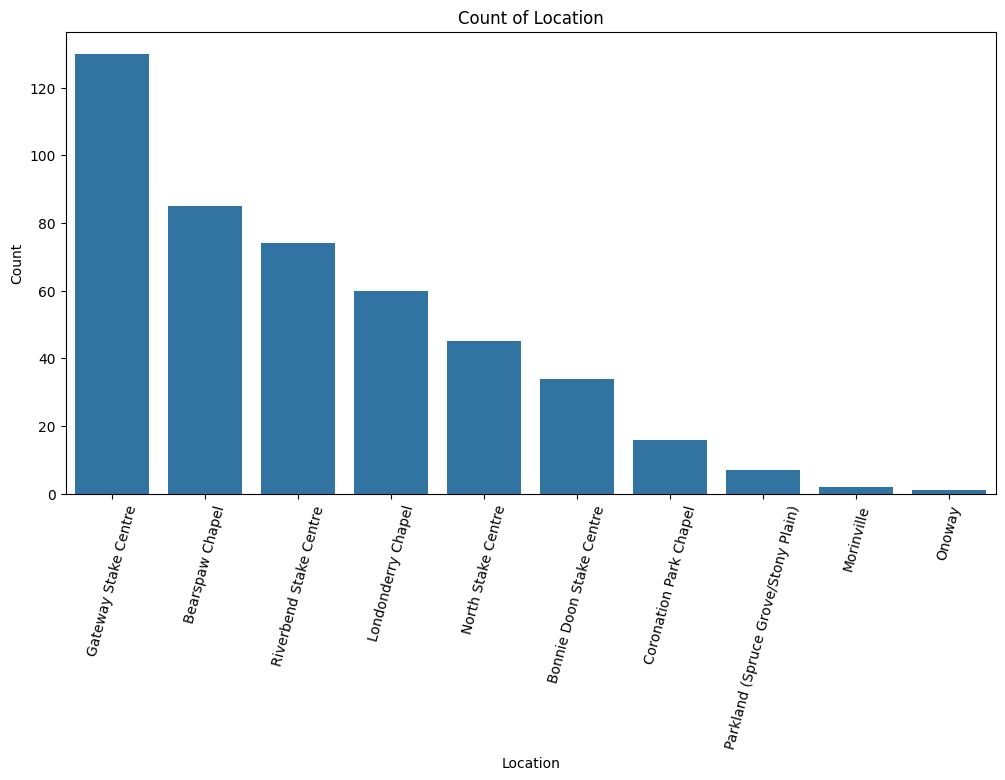

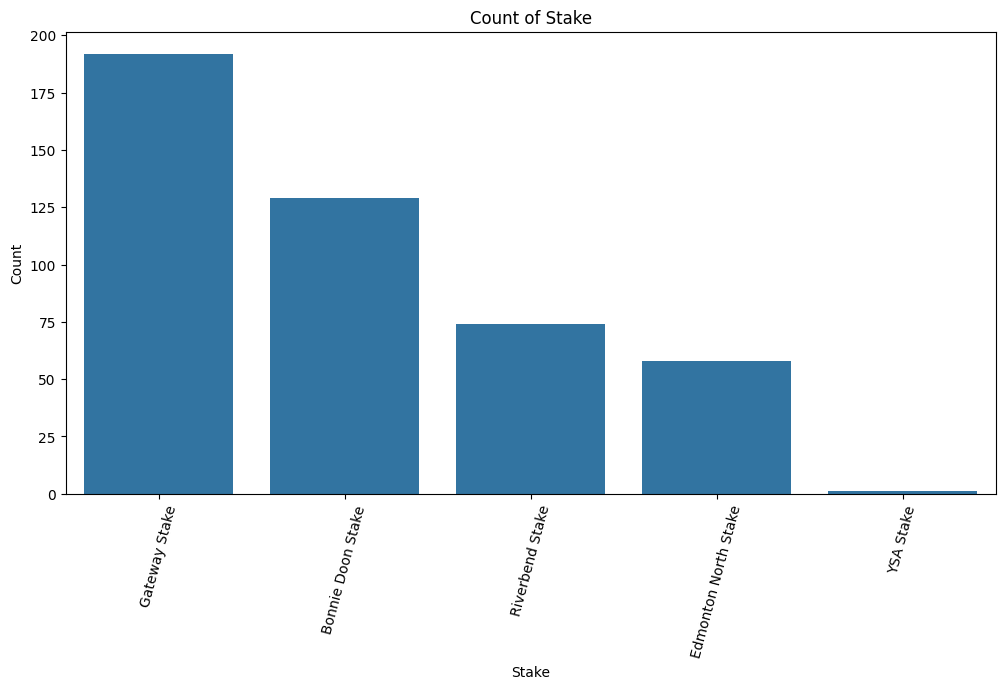

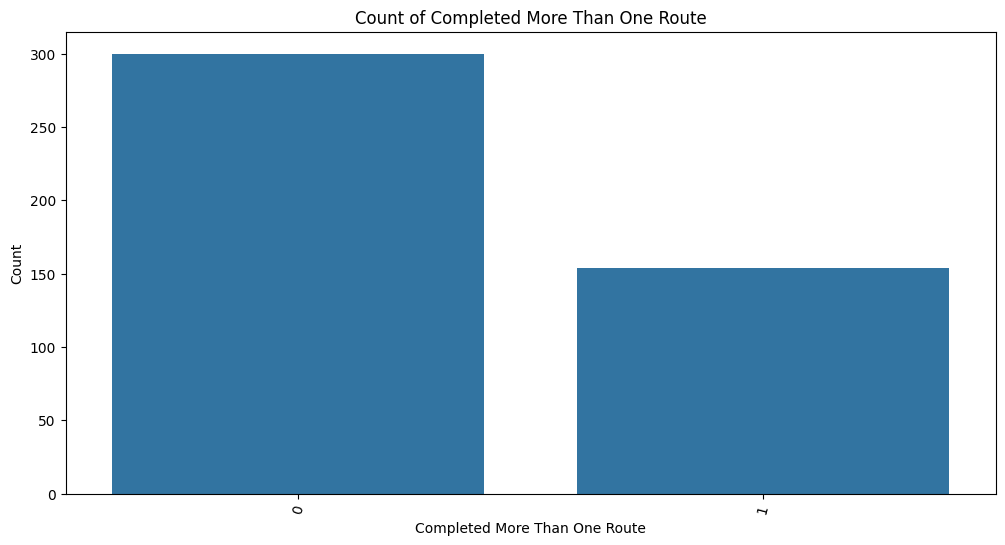

In [ ]:
# Count of categorical variables
# rotation ajusted for easy readability
categorical_columns = ['Location','Stake','Completed More Than One Route']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=75)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<ipython-input-91-c6e2a33e12c7>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)


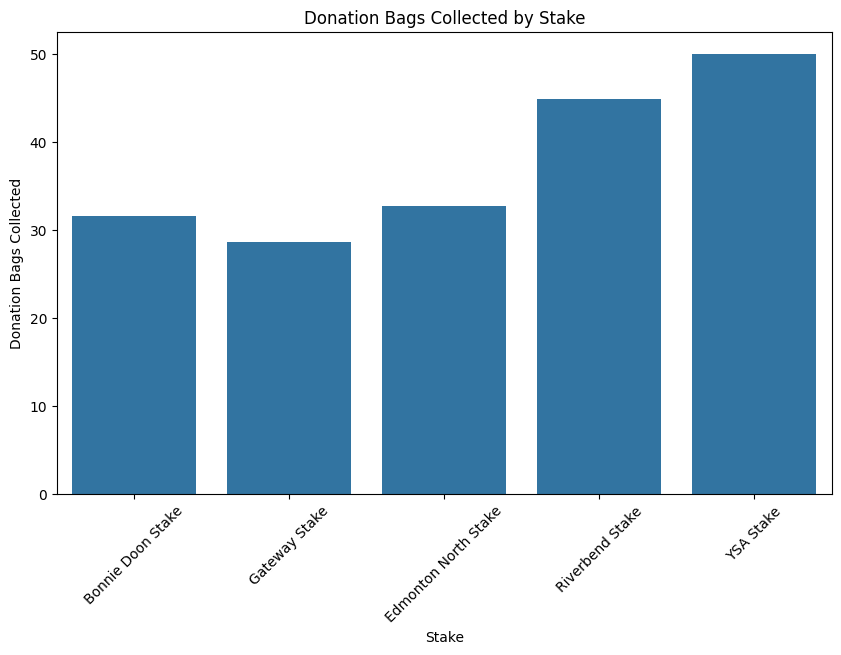

In [ ]:

# Visualizations
# Example: Bar plot of Stake vs. Donation Bags Collected
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Bar chart for Stake vs. Donation Bags Collected
# Used figure size 20, 6 to obtain a well-spaced bar chart
# Used a rotation of 90 to ensure appropriate labelling of x axis

plt.figure(figsize=(20, 6))
sns.barplot(data=data, x='Ward/Branch', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Ward')
plt.xlabel('Ward/Branch')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# A pie chart for Stake vs. Donation Bags Collected
# We used figure size 20, 6 to obtain a well-spaced bar chart
# We used a rotation of 90 to ensure appropriate labelling of x axis
# We  reduce the number of floating point to 1f for easy readability

bags_by_ward = data.groupby('Ward/Branch')['Donation Bags Collected'].sum()
plt.figure(figsize=(10, 200))
plt.pie(bags_by_ward, labels=bags_by_ward.index, autopct='%1.1f%%', startangle=270)
plt.title('Donation Bags Collected by Ward/Branch')
plt.show()


#AutoEDA

In [ ]:
!pip install pandas-profiling[notebook,html]

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport # Use ydata_profiling instead of pandas_profiling
from ydata_profiling.utils.cache import cache_file # Use ydata_profiling instead of pandas_profiling

# Generate Report

In [ ]:
profile = ProfileReport(data, title="Edmonton Food Drive", html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]